In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [7]:
print(df.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [8]:
df.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

In [9]:
df['text'] = df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

In [10]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

In [11]:
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 1978    0
 3989    1
 3935    0
 4078    0
 4086    1
        ..
 3772    0
 5191    0
 5226    0
 5390    0
 860     0
 Name: label, Length: 4457, dtype: int64,
 3245    0
 944     0
 1044    1
 2484    0
 812     1
        ..
 4264    0
 2439    0
 5556    0
 4205    0
 4293    1
 Name: label, Length: 1115, dtype: int64)

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.97847533632287

In [16]:
precision = precision_score(y_test, y_pred)
precision

1.0

In [17]:
recall = recall_score(y_test, y_pred)
recall

0.84

In [18]:
f1 = f1_score(y_test, y_pred)
f1

0.9130434782608696

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[965,   0],
       [ 24, 126]], dtype=int64)

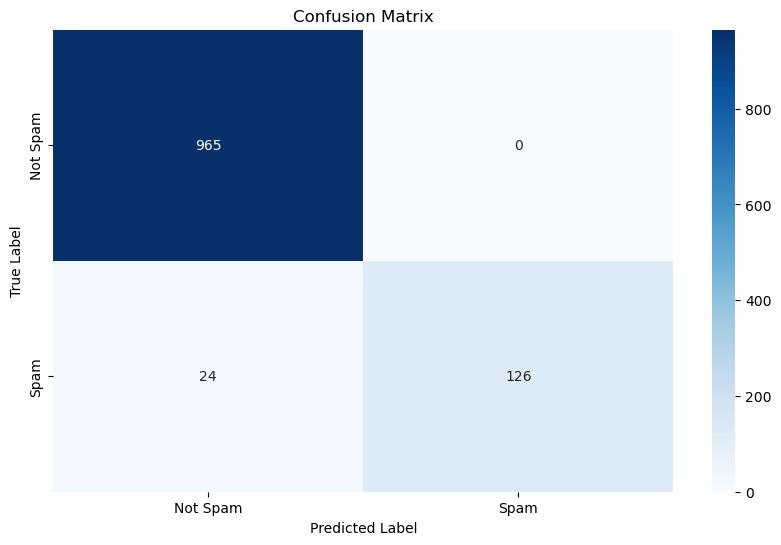

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


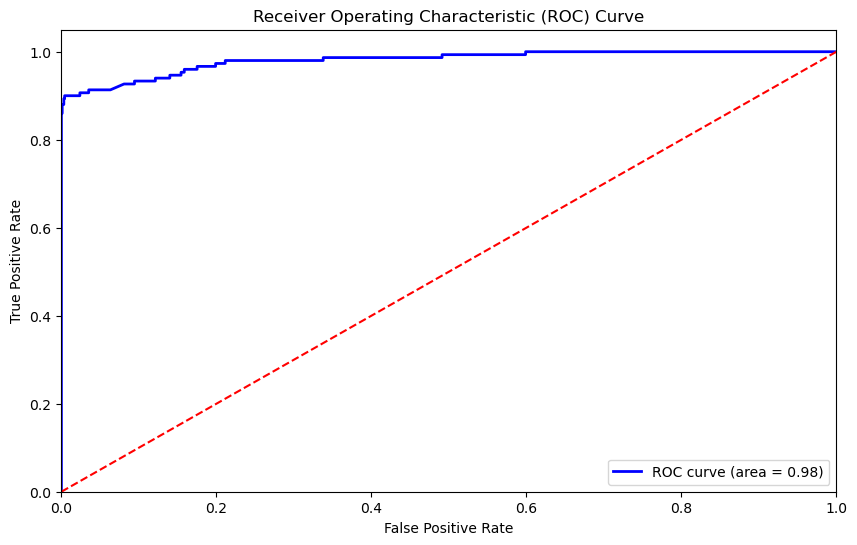

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
feature_names = tfidf.get_feature_names_out()
feature_log_probs = model.feature_log_prob_


In [24]:
top_n = 20
top_spam_indices = np.argsort(feature_log_probs[1])[-top_n:]
top_ham_indices = np.argsort(feature_log_probs[0])[-top_n:]

In [25]:
top_spam_features = [(feature_names[i], feature_log_probs[1][i]) for i in top_spam_indices]
top_spam_features

[('just', -6.143288062657874),
 ('guaranteed', -6.138908682040199),
 ('send', -6.136797507724539),
 ('contact', -6.104438562181709),
 ('win', -6.08025979848122),
 ('service', -6.022260868774975),
 ('nokia', -6.002258693589253),
 ('cash', -5.953783413457591),
 ('urgent', -5.878788966493407),
 ('won', -5.815846502468611),
 ('new', -5.798198987268488),
 ('reply', -5.668545003233329),
 ('ur', -5.6211056772013395),
 ('prize', -5.61307333115395),
 ('text', -5.595272962937164),
 ('stop', -5.541741976060994),
 ('claim', -5.4584015031284085),
 ('mobile', -5.449927956602329),
 ('txt', -5.401858933417513),
 ('free', -5.05998471623815)]

In [26]:
top_ham_features = [(feature_names[i], feature_log_probs[0][i]) for i in top_ham_indices]
top_ham_features

[('need', -5.67553138973209),
 ('want', -5.62099126584992),
 ('later', -5.5619997755243755),
 ('lor', -5.549606264786631),
 ('ur', -5.492743062746311),
 ('home', -5.478612872669121),
 ('like', -5.4752903394950785),
 ('sorry', -5.474359407755339),
 ('time', -5.468271788022006),
 ('going', -5.464259018875763),
 ('know', -5.429825386578036),
 ('good', -5.397884672795875),
 ('got', -5.3566458745923065),
 ('dont', -5.33202939311373),
 ('just', -5.2847254016380605),
 ('ltgt', -5.233068600670436),
 ('ill', -5.2245966167844715),
 ('come', -5.219764470690236),
 ('ok', -4.880312054861962),
 ('im', -4.820912310519041)]

In [27]:
top_features_df = pd.DataFrame(top_spam_features + top_ham_features, columns=['Feature', 'Log Probability'])
top_features_df['Type'] = ['Spam'] * top_n + ['Not Spam'] * top_n

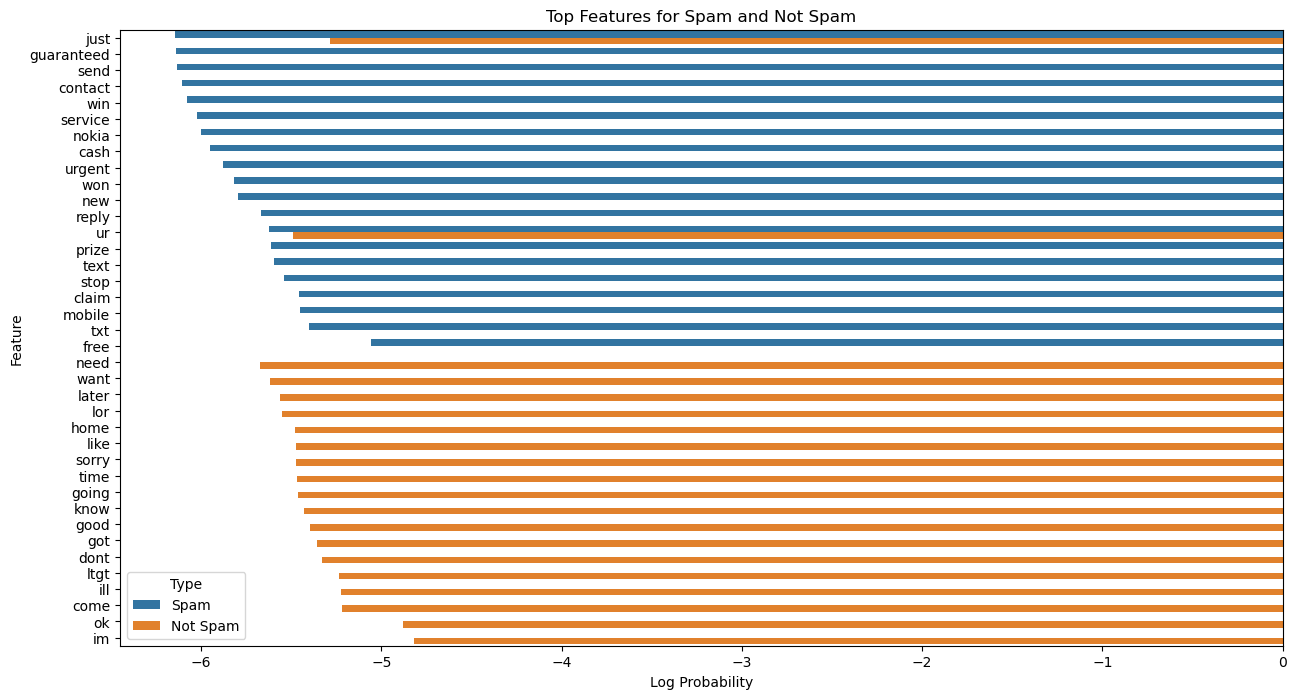

In [28]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Log Probability', y='Feature', hue='Type', data=top_features_df)
plt.title('Top Features for Spam and Not Spam')
plt.show()

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [30]:
y_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

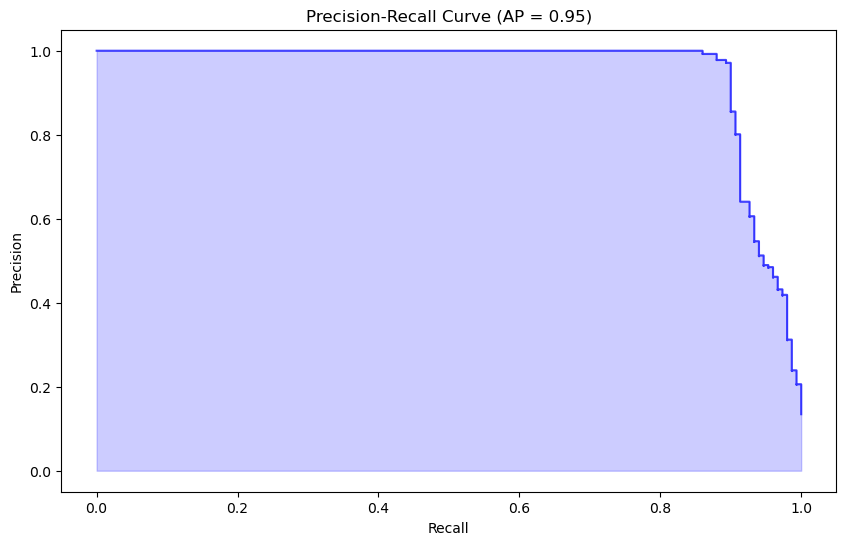

In [31]:
plt.figure(figsize=(10, 6))
plt.step(recall, precision, where='post', color='blue', alpha=0.7)
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP = {average_precision:.2f})')
plt.show()

In [32]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Not Spam', 'True Spam'], columns=['Predicted Not Spam', 'Predicted Spam'])
conf_matrix_df

,Predicted Not Spam,Predicted Spam
True Not Spam,965,0
True Spam,24,126


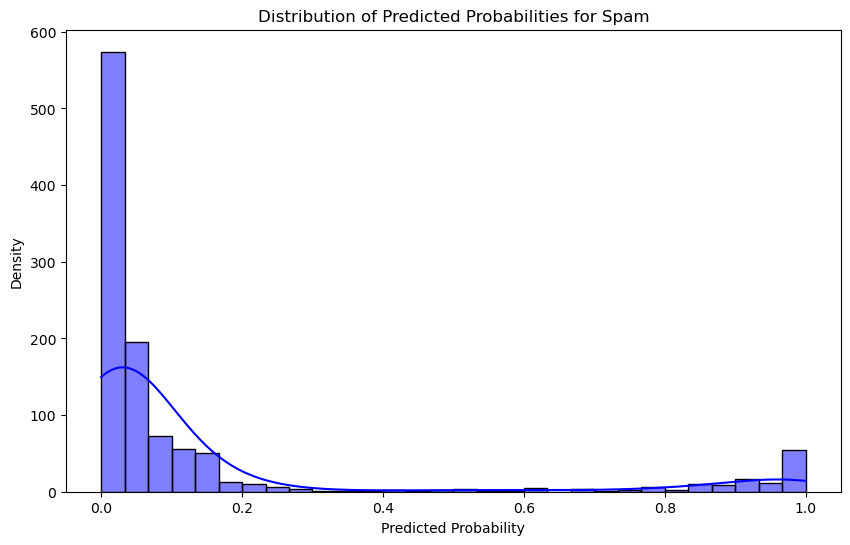

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(y_proba, kde=True, bins=30, color='blue')
plt.title('Distribution of Predicted Probabilities for Spam')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.show()

In [34]:
top_n = 20
top_spam_features = [(feature_names[i], feature_log_probs[1][i]) for i in top_spam_indices]
top_ham_features = [(feature_names[i], feature_log_probs[0][i]) for i in top_ham_indices]


In [35]:
top_features_df = pd.DataFrame(top_spam_features + top_ham_features, columns=['Feature', 'Log Probability'])
top_features_df['Type'] = ['Spam'] * top_n + ['Not Spam'] * top_n

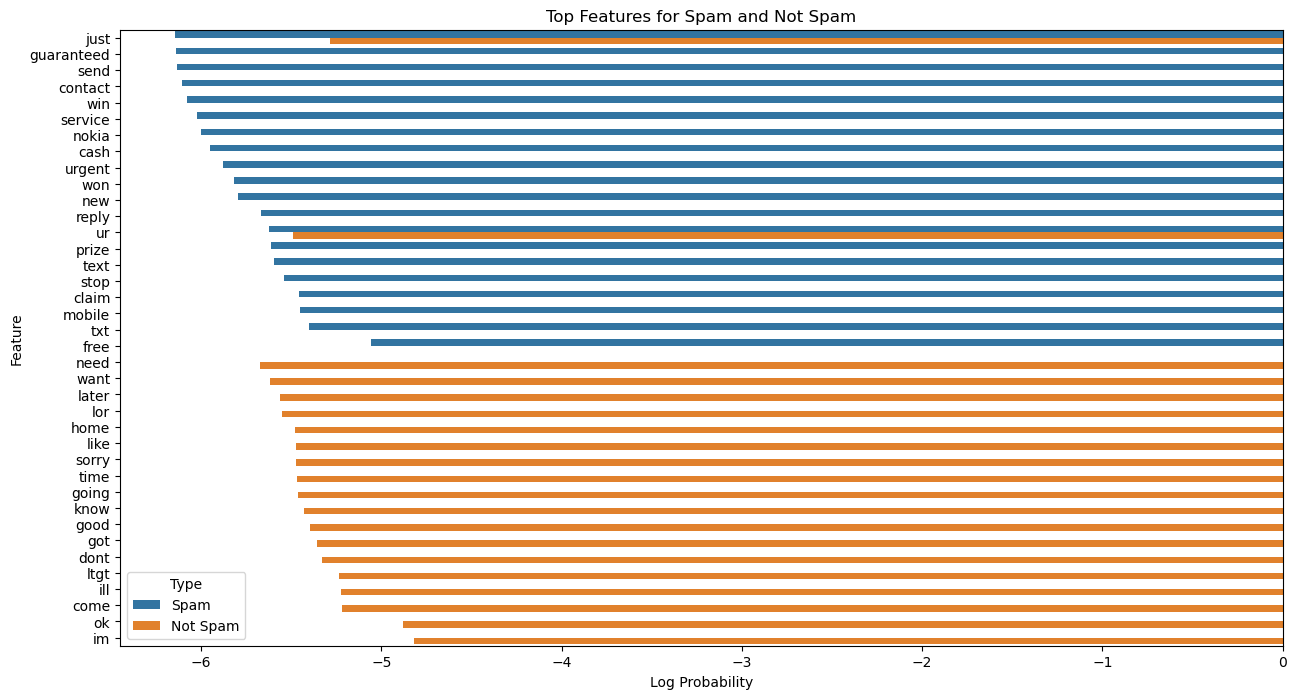

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Log Probability', y='Feature', hue='Type', data=top_features_df)
plt.title('Top Features for Spam and Not Spam')
plt.show()

In [37]:
plt.figure(figsize=(15, 8))
top_features_df = pd.DataFrame({
    'Feature': feature_names[top_spam_indices],
    'Spam Log Probability': feature_log_probs[1][top_spam_indices],
    'Not Spam Log Probability': feature_log_probs[0][top_spam_indices]
})
top_features_df = top_features_df.melt(id_vars='Feature', var_name='Type', value_name='Log Probability')

<Figure size 1500x800 with 0 Axes>

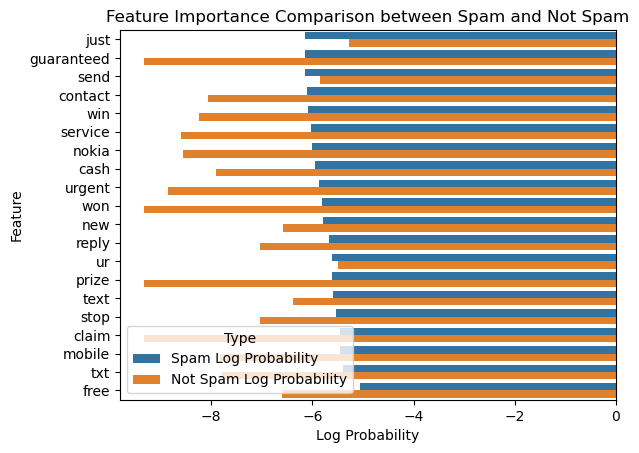

In [38]:
sns.barplot(x='Log Probability', y='Feature', hue='Type', data=top_features_df)
plt.title('Feature Importance Comparison between Spam and Not Spam')
plt.show()